In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# This problem is often referred to as the curse of dimensionality

Well, there’s just plenty of space in high dimensions. As a
result, high-dimensional datasets are at risk of being very sparse: most training
instances are likely to be far away from each other. This also means that a new
instance will likely be far away from any training instance, making predictions much
less reliable than in lower dimensions, since they will be based on much larger extrap‐
olations. In short, the more dimensions the training set has, the greater the risk of
overfitting it.

In theory, one solution to the curse of dimensionality could be to increase the size of
the training set to reach a sufficient density of training instances. Unfortunately, in
practice, the number of training instances required to reach a given density grows
exponentially with the number of dimensions.

# Main Approaches for Dimensionality Reduction

# Projection
In most real-world problems, training instances are not spread out uniformly across
all dimensions. Many features are almost constant, while others are highly correlated
(as discussed earlier for MNIST). As a result, all training instances lie within (or close
to) a much lower-dimensional subspace of the high-dimensional space. This sounds
very abstract, so let’s look at an example. In Figure 8-2 you can see a 3D dataset repre‐
sented by circles.


Utility class to draw 3D arrows (copied from http://stackoverflow.com/questions/11140163)

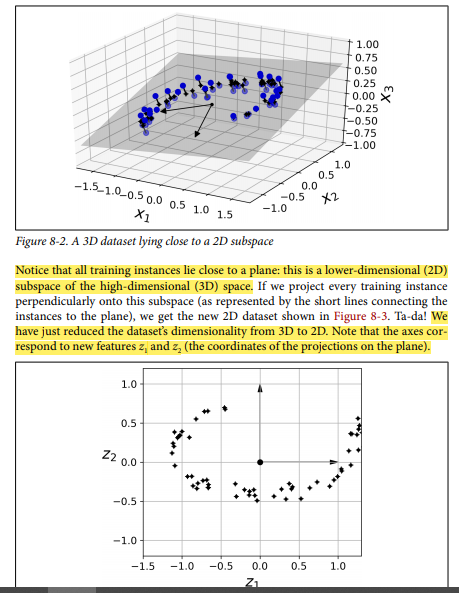

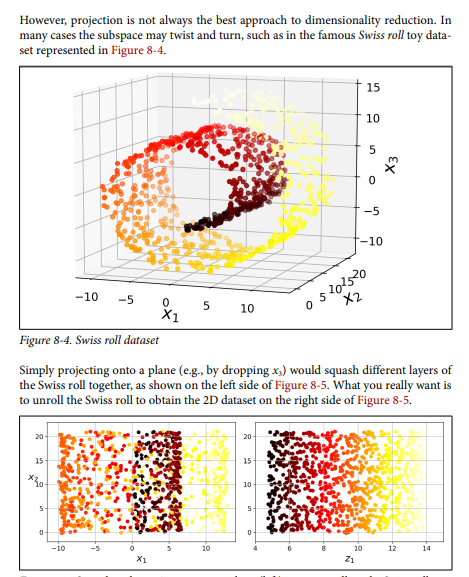

# Manifold Learning
The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D
shape that can be bent and twisted in a higher-dimensional space. More generally, a
d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally
resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it
locally resembles a 2D plane, but it is rolled in the third dimension.
Many dimensionality reduction algorithms work by modeling the manifold on which
the training instances lie; this is called Manifold Learning. It relies on the manifold
assumption, also called the manifold hypothesis, which holds that most real-world
high-dimensional datasets lie close to a much lower-dimensional manifold.

The manifold assumption is often accompanied by another implicit assumption: that
the task at hand (e.g., classification or regression) will be simpler if expressed in the
lower-dimensional space of the manifold.

In short, reducing the dimensionality of your training set before training a model will
usually speed up training, but it may not always lead to a better or simpler solution; it
all depends on the dataset.


# PCA
Principal Component Analysis (PCA) is by far the most popular dimensionality reduc‐
tion algorithm. First it identifies the hyperplane that lies closest to the data, and then
it projects the data onto it

Preserving the Variance
Before you can project the training set onto a lower-dimensional hyperplane, you
first need to choose the right hyperplane. For example, a simple 2D dataset is repre‐
sented on the left in Figure 8-7, along with three different axes (i.e., 1D hyperplanes).
On the right is the result of the projection of the dataset onto each of these axes. As
you can see, the projection onto the solid line (c1) preserves the maximum variance, while
the projection onto the dotted line (C2) preserves very little variance and the projection
onto the dashed line preserves an intermediate amount of variance.


Saving figure pca_best_projection_plot


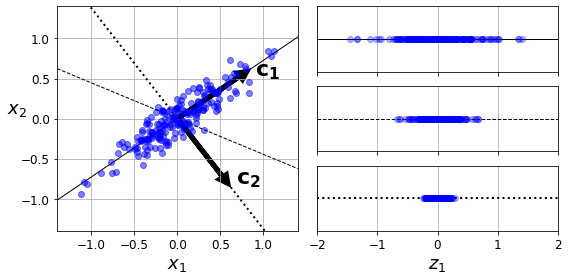

In [4]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

It seems reasonable to select the axis that preserves the maximum amount of var‐
iance, as it will most likely lose less information than the other projections. Another
way to justify this choice is that it is the axis that minimizes the mean squared dis‐
tance between the original dataset and its projection onto that axis. This is the rather
simple idea behind PCA.


# Principal Components
PCA identifies the axis that accounts for the largest amount of variance in the train‐
ing set. In Figure above, it is the solid line (C1). It also finds a second axis, orthogonal to the
first one, that accounts for the largest amount of remaining variance. In this 2D
example there is no choice: it is the dotted line(c2). If it were a higher-dimensional data‐
set, PCA would also find a third axis, orthogonal to both previous axes, and a fourth,
a fifth, and so on—as many axes as the number of dimensions in the dataset.
The i
th axis is called the i
th principal component (PC) of the data. 

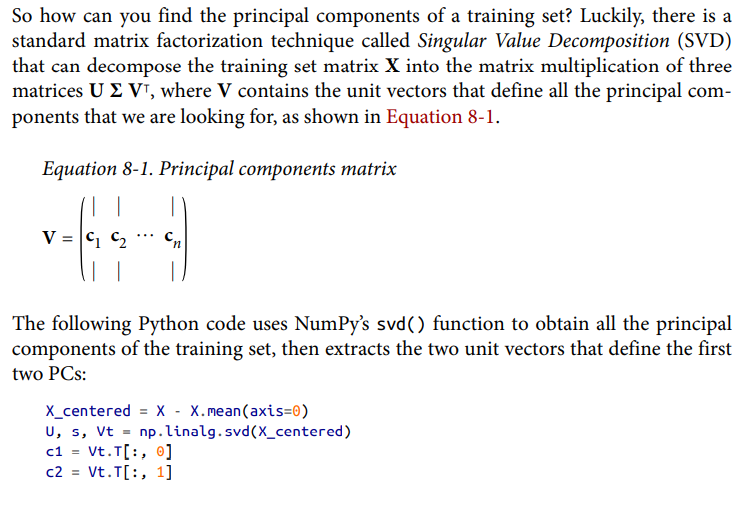

PCA assumes that the dataset is centered around the origin. As we
will see, Scikit-Learn’s PCA classes take care of centering the data
for you. If you implement PCA yourself (as in the preceding exam‐
ple), or if you use other libraries, don’t forget to center the data
first.

Build 3D dataset:

In [9]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# PCA using SVD decomposition

In [12]:
# Centering the data X_centered
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
Vt.T


array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [14]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c1,c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

Projecting Down to d Dimensions
Once you have identified all the principal components, you can reduce the dimen‐
sionality of the dataset down to d dimensions by projecting it onto the hyperplane
defined by the first d principal components. Selecting this hyperplane ensures that the
projection will preserve as much variance as possible. For example, in Figure 8-2 the
3D dataset is projected down to the 2D plane defined by the first two principal components, preserving a large part of the dataset’s variance. As a result, the 2D pro‐
jection looks very much like the original 3D dataset

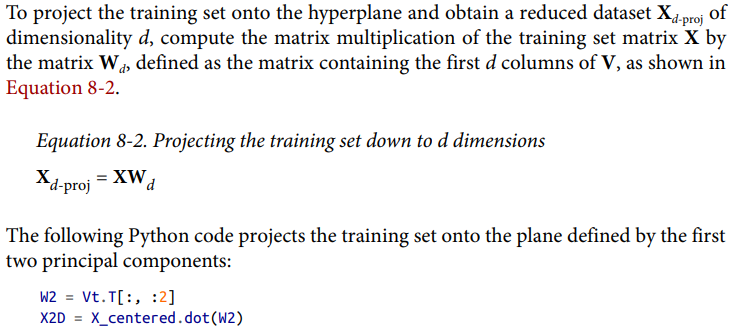

In [15]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [19]:
X2D_using_svd = X2D

# new matrix with two columns c1 & c2
X2D_using_svd.shape

(60, 2)

# PCA using Scikit-Learn
With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [21]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [22]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [23]:
# checking if X2D calulated via two methods give same result 
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [24]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [25]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [26]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The PCA object gives access to the principal components that it computed:

In [27]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Compare to the first two principal components computed using the SVD method:

In [28]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

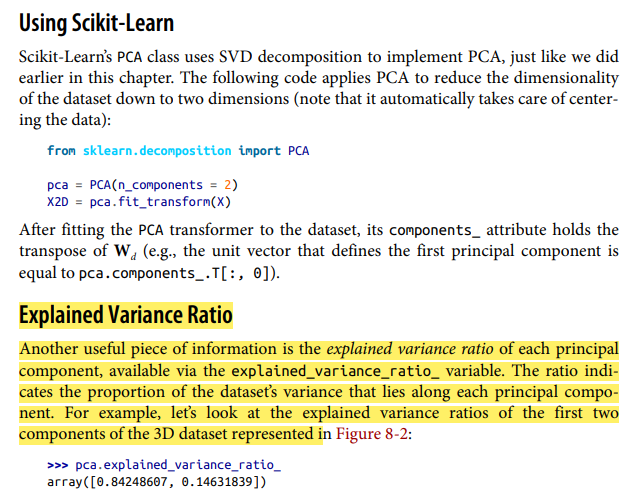

This output tells you that 84.2% of the dataset’s variance lies along the first PC, and
14.6% lies along the second PC. This leaves less than 1.2% for the third PC, so it is
reasonable to assume that the third PC probably carries little information.

In [29]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

By projecting down to 2D, we lost about 1.1% of the variance:

In [30]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

# Choosing the Right Number of Dimensions
Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
simpler to choose the number of dimensions that add up to a sufficiently large por‐
tion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for
data visualization—in that case you will want to reduce the dimensionality down to 2
or 3.
The following code performs PCA without reducing dimensionality, then computes
the minimum number of dimensions required to preserve 95% of the training set’s
variance:


In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [7]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [32]:
d

154

Saving figure explained_variance_plot


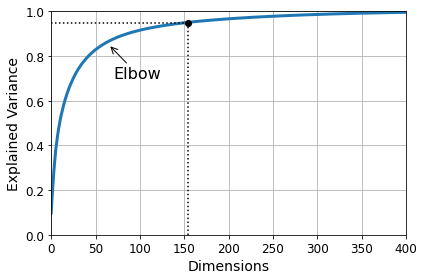

In [33]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

You could then set n_components=d and run PCA again. But there is a much better option: instead of specifying the number of principal components you want to pre‐ serve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [34]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [35]:
pca.n_components_

154

In [36]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295708

# PCA for Compression

After dimensionality reduction, the training set takes up much less space. As an
example, try applying PCA to the MNIST dataset while preserving 95% of its var‐
iance. You should find that each instance will have just over 150 features, instead of
the original 784 features. So, while most of the variance is preserved, the dataset is
now less than 20% of its original size

It is also possible to decompress the reduced dataset back to 784 dimensions by
applying the inverse transformation of the PCA projection. This won’t give you back
the original data, since the projection lost a bit of information (within the 5% var‐
iance that was dropped), but it will likely be close to the original data. The mean
squared distance between the original data and the reconstructed data (compressed
and then decompressed) is called the reconstruction error.


In [53]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [54]:
X_reduced_pca = X_reduced

In [39]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


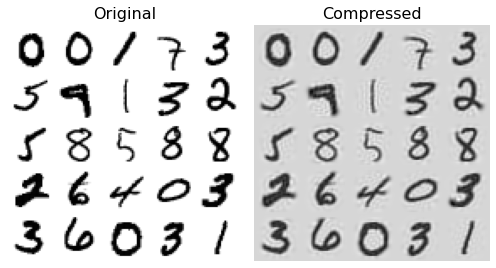

In [40]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

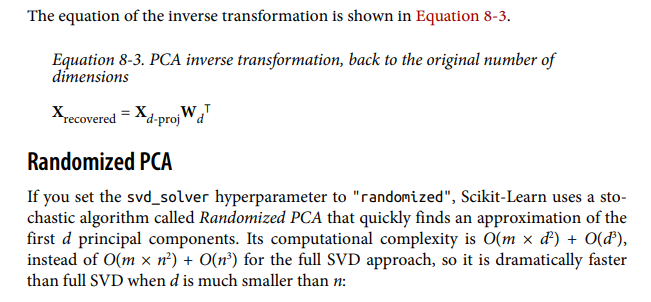

In [41]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)


By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the
randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m
or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full
SVD, you can set the svd_solver hyperparameter to "full"

# Incremental PCA
One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed. They allow you to split the
training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.

The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s
array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5
to
reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like
before). Note that you must call the partial_fit() method with each mini-batch,
rather than the fit() method with the whole training set:


In [42]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [43]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

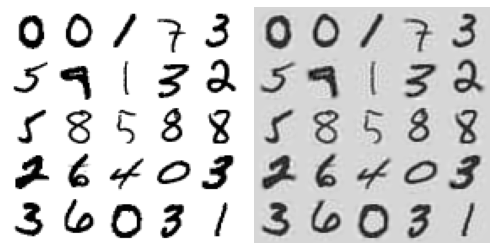

In [44]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [49]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal:

In [46]:
np.allclose(pca.mean_, inc_pca.mean_)

True

But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:

In [55]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# Kernel PCA

 kernel trick, a mathematical technique that implicitly
maps instances into a very high-dimensional space (called the feature space), enabling
nonlinear classification and regression with Support Vector Machines. Recall that a
linear decision boundary in the high-dimensional feature space corresponds to a
complex nonlinear decision boundary in the original space.It turns out that the same trick can be applied to PCA, making it possible to perform
complex nonlinear projections for dimensionality reduction. This is called Kerne PCA. 

The following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF
kernel


In [56]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [59]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Saving figure kernel_pca_plot


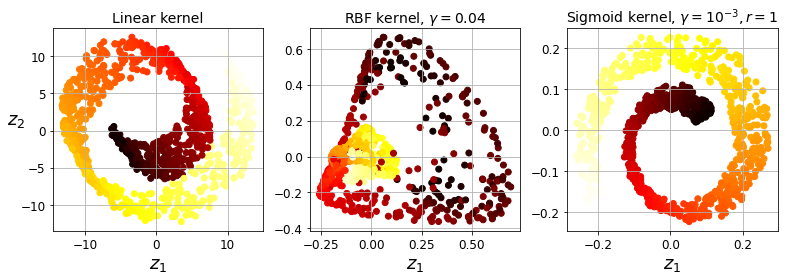

In [60]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

Figure above shows the Swiss roll, reduced to two dimensions using a linear kernel
(equivalent to simply using the PCA class), an RBF kernel, and a sigmoid kernel.


# Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no obvious performance
measure to help you select the best kernel and hyperparameter values. That said,
dimensionality reduction is often a preparation step for a supervised learning task
(e.g., classification), so you can use grid search to select the kernel and hyperparame‐
ters that lead to the best performance on that task. The following code creates a twostep pipeline, first reducing dimensionality to two dimensions using kPCA, then
applying Logistic Regression for classification. Then it uses GridSearchCV to find the
best kernel and gamma value for kPCA in order to get the best classification accuracy
at the end of the pipeline:


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

The best kernel and hyperparameters are then available through the best_params_
variable:

In [62]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


 One solution is to train a
supervised regression model, with the projected instances as the training set and the
original instances as the targets. Scikit-Learn will do this automatically if you set
fit_inverse_transform=True, as shown in the following code:

In [63]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

You can then compute the reconstruction pre-image error:

In [64]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

1.1764447582305019e-26

Now you can use grid search with cross-validation to find the kernel and hyperpara‐
meters that minimize this error.

# Locally Linear Embedding (LLE)

Locally Linear Embedding (LLE)8
is another powerful nonlinear dimensionality reduc‐
tion (NLDR) technique. It is a Manifold Learning technique that does not rely on
projections, like the previous algorithms do. In a nutshell, LLE works by first measur‐
ing how each training instance linearly relates to its closest neighbors (c.n.), and then
looking for a low-dimensional representation of the training set where these local
relationships are best preserved (more details shortly). This approach makes it partic‐
ularly good at unrolling twisted manifolds, especially when there is not too much
noise.

The following code uses Scikit-Learn’s LocallyLinearEmbedding class to unroll the
Swiss roll:

In [65]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [68]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)
X_reduced

array([[-0.02911379,  0.05697419],
       [-0.04602579,  0.06450202],
       [ 0.01955172, -0.02685072],
       ...,
       [ 0.049233  ,  0.03084511],
       [-0.03588968, -0.01670852],
       [ 0.0474084 ,  0.01104865]])

Saving figure lle_unrolling_plot


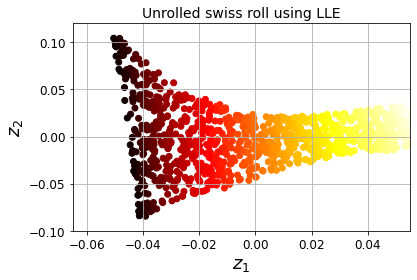

In [67]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

# LEE Algorithm 

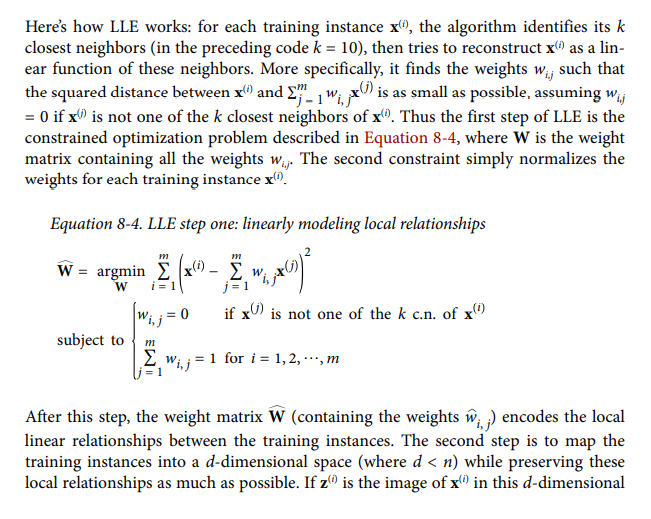

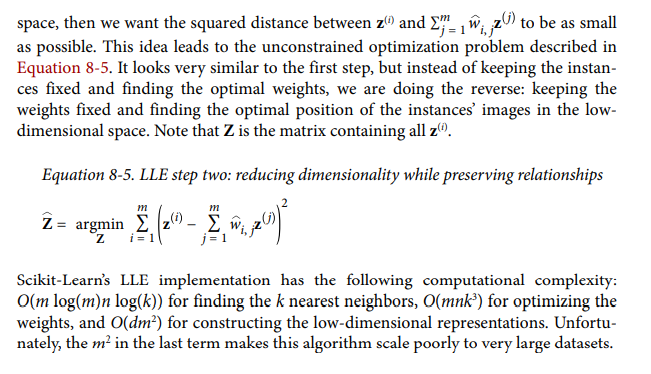

# Other Dimensionality Reduction Techniques

# Random Projections
As its name suggests, projects the data to a lower-dimensional space using a ran‐
dom linear projection. This may sound crazy, but it turns out that such a random
projection is actually very likely to preserve distances well. The quality of the dimensionality reduction depends on the number of
instances and the target dimensionality, but surprisingly not on the initial dimen‐
sionality.

# Multidimensional Scaling (MDS)
Reduces dimensionality while trying to preserve the distances between the
instances

# Isomap
Creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances9 between
the instances.

# t-Distributed Stochastic Neighbor Embedding (t-SNE)
Reduces dimensionality while trying to keep similar instances close and dissimi‐
lar instances apart. It is mostly used for visualization, in particular to visualize
clusters of instances in high-dimensional space (e.g., to visualize the MNIST
images in 2D)

In [69]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [70]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [71]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

Saving figure other_dim_reduction_plot


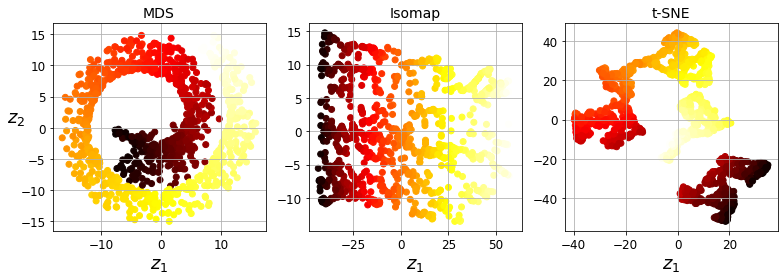

In [73]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()